# 01 - Preliminaries and data

Welcome to this tutorial! In this notebook we will review:
- How this tutorial is organized, and the background knowledge you will need for it.
- Common Python libraries for performing machine learning analyses, outlining the ones we will use in this tutorial.
- The dataset used for the exercises.
---

# About this tutorial

This short interactive tutorial will show you 
how to use the [scikit-learn](https://scikit-learn.org/) 
Python package to perform basic machine learning analysis. 
It will also cover how to visualize your results with 
the [Matplotlib](https://matplotlib.org/) 
and [seaborn](https://seaborn.pydata.org/) Python packages. 

## The contents
{TO-DO: enumerate notebooks}

## Assumed background knowledge
- For this tutorial, we assume you have:
    - Basic knowledge of Machine Learning concepts. 
    For example, you know the difference between supervised/unsupervised learning, 
    or the difference between classification, regression and clustering models.
    - Basic experience with Python
- We also assume that you have seen the video 
["A tutorial on machine learning"](https://www.youtube.com/watch?v=pOAK6ynM11E&list=PLVso6Qs8PLCiciMyxyqxCzp38G5tEhdy6&index=6) 
by [Laura Suarez](https://twitter.com/LauraESuarez24).

If you think you are lacking some of this knowledge/experience, 
we recommend the following resources to fill this gap:

### ML background resources
{TO-DO: list}

### Python background resources

{TO-DO: list}

---

# Machine Learning software in Python

The most well-known Python library for performing machine learning (ML) analysis is [__scikit-learn__](https://scikit-learn.org/).
- (...) explain about the resources in scikit learn

In neuroscience research, other toolboxes have been developed specifically for carrying out ML analysis on neuroimaging data. For example, [nilearn](https://nilearn.github.io/) is very popular among fMRI researchers, while [mne](https://martinos.org/mne/stable/index.html) is most known among the M/EEG community.

Scikit-learn is the backbone of both _nilearn_ and _mne_, so in this tutorial we will explain how to use this more general toolbox with the hopes that learning how to use it will also come in handy when using more specific toolboxes.

- (...) [explain that we will be using other software like pandas and numpy]

---

# The datasets

In each of the notebooks we will exemplify how to run ML analysis using fake data generated by _scikit-learn_, or will use well-known datasets that can be retrieved using _scikit-learn_ API. We will not be using real neuroimaging data for these purposes.

However, at the end of each notebook you will find exercises where you will need to practice what you have learned using a real neuroimaging dataset. For these exercises, we will use a dataset from the [Autism Brain Imaging Data Exchange II](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html) (ABIDE II) project. ABIDE is a long-running effort to advance understanding of autism by aggregating and sharing autism-related structural and functional imaging datasets from around the world.

Let's familiarize ourselves with this dataset. We will use [pandas](https://pandas.pydata.org/) for inspecting the data in this and the following tutorials. If you are not familiar with _pandas_ you can read their tutorial ["10 minutes to pandas"](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

In [13]:
import pandas as pd

abide_data = pd.read_csv("../data/abide2.tsv", sep="\t")
abide_data

,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ABIDEII-IU_1,29570,20.000000,10.644232,1.0,2.0,3321.0,290.0,381.0,2802.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,ABIDEII-NYU_1,29233,10.862000,16.260139,1.0,2.0,2860.0,162.0,456.0,2460.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,ABIDEII-SDSU_1,28862,11.200000,13.211420,1.0,2.0,3377.0,177.0,497.0,2810.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,ABIDEII-KKI_1,29312,9.789041,14.538742,2.0,2.0,3322.0,297.0,426.0,2640.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


Using _pandas_, we can quickly visualize that our dataset has 1004 rows and 1446 columns. Each row appears to store the information about one subject, measured in a specific neuroimaging center (endoded by the column `site`). The table provides demographic data for such participant, specifically their `age` and `sex`. 

Let's plot the age of the participants. Don't worry about the code that produces this plot yet. How to visualize data will be showed in [notebook 5](./05-visualization.ipynb).

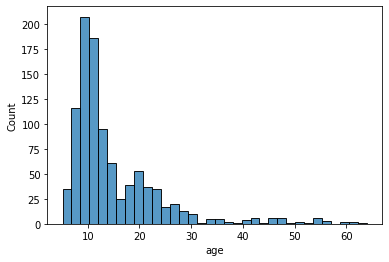

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(abide_data["age"])
plt.show()

We can see that the majority of the partipants are kids.

In this tutorial, this demographic data will not be relevant. In our case, we are mostly interested in being able to predict whether the participant has autism or not, from their brain recordings. 

Thus, the column `group` encodes the variable we want to predict (1 = autism, 2 = control).

(...) Explain brain recordings:
- These dataset encodes fMRI recordings with the columns starting with `fs`. 
- What ROIs are

(...) We are lucky, because this dataset is already pretty much prepared for performing machine learning analysis with it. A dataset ready for machine learning analysis:
- explain `X` (with samples (also called observations) and features (also called predictors)) 
    - In neuro features can represent channels, voxels, rois, etc.
- and `y` (labels, targets)
- explain the format of `X` {n_samples by n_features}
    - Add image
- In scikit-learn `X` can both be passed as a pandas dataframe or as a numpy array.


# Acknowledgements

This tutorial is similar to, and takes inspiration from:
- https://inria.github.io/scikit-learn-mooc/
- https://github.com/jakevdp/sklearn_tutorial
- https://github.com/tyarkoni/ML4PS
- https://github.com/neurohackademy/nh2020-curriculum/blob/master/tu-machine-learning-yarkoni/01-preliminaries.ipynb
- Link to Sina's tutorial